# Workshop: Assumptions, Diagnostics and Transformations


## Diagnostic Plots

### Standard Plots

### Additional Plots
As well as the standard plots produced by calling `plot(mod)`, there are some additional plots that can be useful to see various assumptions or data features more clearly. Here, we will have a brief rundown of some of the more useful.

#### Correlation Plots
Although previously we indicated that assessing correlation between predictors is best served by the VIF, it can be useful at times to investigate correlation as part of the initial descriptive exploration of the data, prior to fitting any model. For that purpose, a correlation plot can be useful. In the example below, we use the `corrplot` package to visualise the entire `mtcars` dataset.

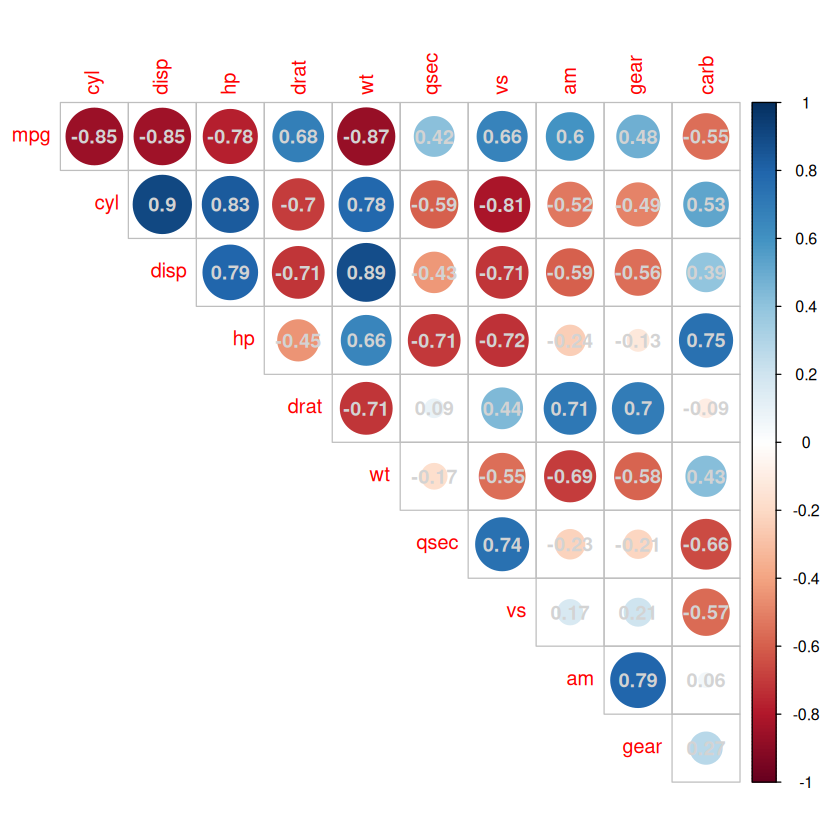

In [5]:
library('corrplot')
data(mtcars)
corrplot(cor(mtcars), 
        type='upper',            # just upper-diagonal
        addCoef.col='lightgrey', # add coeficient labels
        diag=FALSE)              # hide diagonal

#### VIF Barplot
Although we have already seen how to produce the VIF values, it can be useful to visualise this as a bar chart with standard cut-offs of 5 and 10. In the example below, we include the same `wt.copy` variable as used previously.

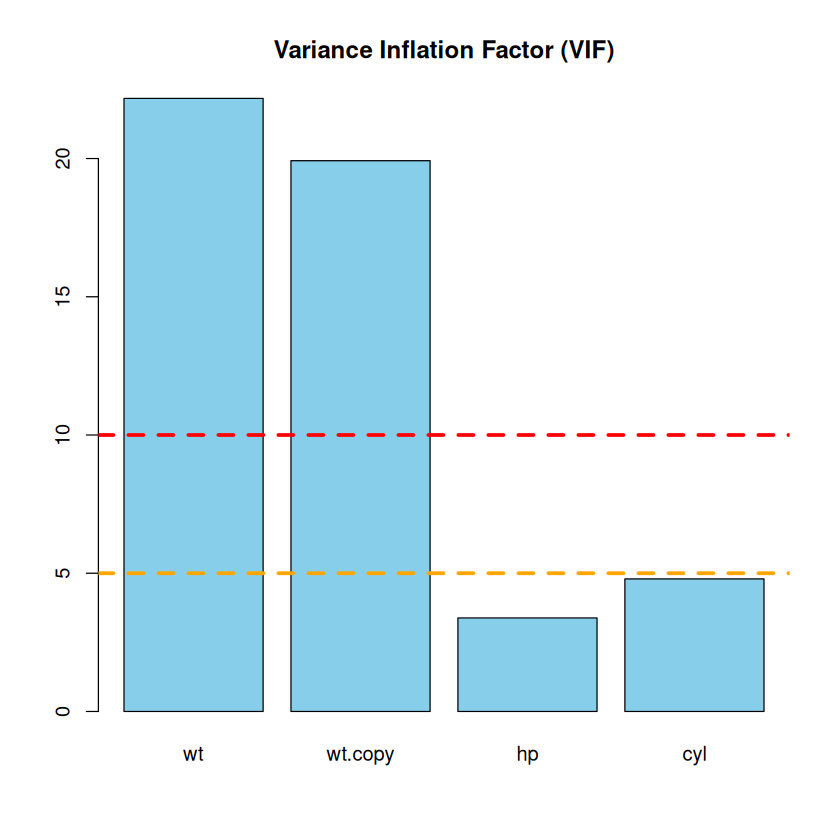

In [6]:
library(car)
set.seed(666)
wt           <- mtcars$wt
wt.copy      <- wt + rnorm(n=length(wt), mean=0, sd=0.2)
mod.multicol <- lm(mpg ~ wt + wt.copy + hp + cyl, data=mtcars)
vif.values   <- vif(mod.multicol)

barplot(vif.values, main = "Variance Inflation Factor (VIF)", col = "skyblue")
abline(h=5,  col="orange", lty=2, lwd=3)
abline(h=10, col="red",    lty=2, lwd=3)

#### Influence Plot
Another useful plot included as part of the `car` package is the *influence* plot, where studentised residuals, leverage, Cook's distance and standard thresholds for extreme points are all combined into the same plot. As an example:

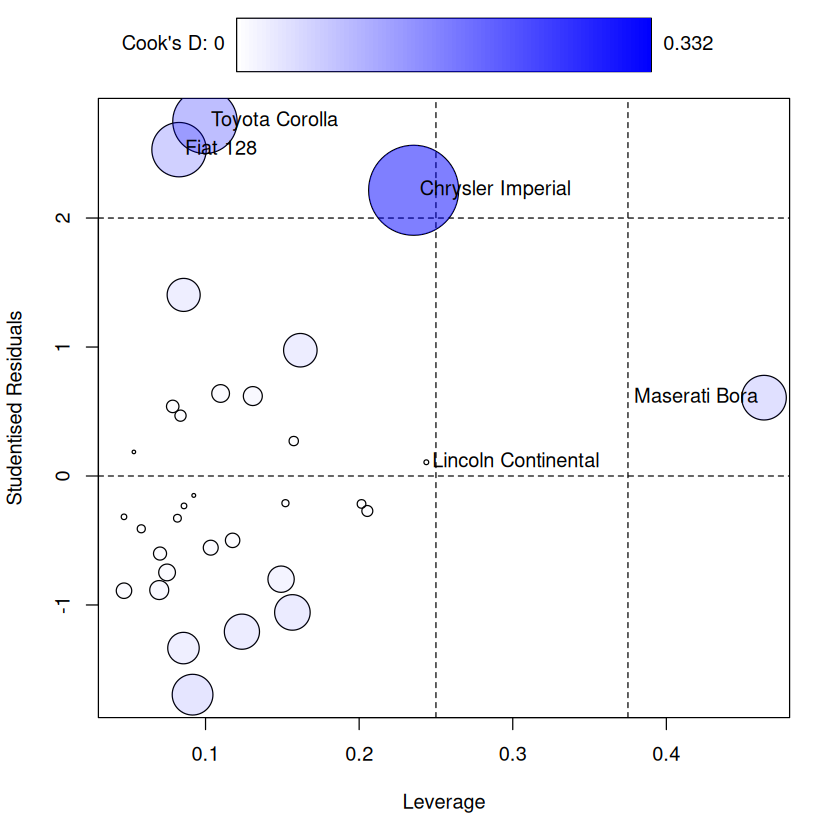

In [7]:
mod <- lm(mpg ~ wt + hp + cyl, data=mtcars)
notable <- influencePlot(mod, xlab="Leverage", ylab="Studentised Residuals")

Here we can see leverage plotted against the *studentised* resdiduals, with the magnitude of Cook's Distance displayed as bubbles of different sizes around each point. The mapping between these bubbles and Cook's Distance is shown by the colour bar at the top. Looking at the top value of the colourmap, we can see it is below our lower heuristic of $D > 0.5$, meaning we have little concern here in terms of Cook's distance. This agrees with what we saw earlier, as no points fell within the contour lines of $D = 0.5$ and $D = 1$. In addition, heuristics of 2 and -2 are shown vertically for outliers (though the lower threshold is not visible in the above plot), with heuristics of $2\frac{p}{n}$ and $3\frac{p}{n}$ shown horizontally for leverage. Notable points have also been labelled and are returned as a data frame

In [8]:
print(notable)

                      StudRes        Hat        CookD
Lincoln Continental 0.1065775 0.24373270 0.0009486833
Chrysler Imperial   2.2153833 0.23547715 0.3316313326
Fiat 128            2.5303244 0.08274176 0.1210330843
Toyota Corolla      2.7498370 0.09961207 0.1694339333
Maserati Bora       0.6073374 0.46356582 0.0815260489


How these points are chosen requires a little explanation. The labels are based on the top two points for each of the influence measures. For the studentised residuals, the two largest points are the Toyota Corolla and the Fiat 128. For the leverage values, the two largest points are the Maserati Bora and the Lincoln Continental. For Cook's Distance, the two largest points are Chrysler Imperial and the Toyota Corolla. So this gives five unique data points (because the Toyota appears *twice*). The labelling in the plot can then be thought of as the two largest values horizontally, the two largest vertically, and the two largest in terms of their bubble size. Of note is that this will happen irrespective of whether any of the data points are above any threshold of concern on any measure. For instance, none of these data have $D_{i} > 0.5$, despite the function still labelling the top two values.

#### Added-variable Plots

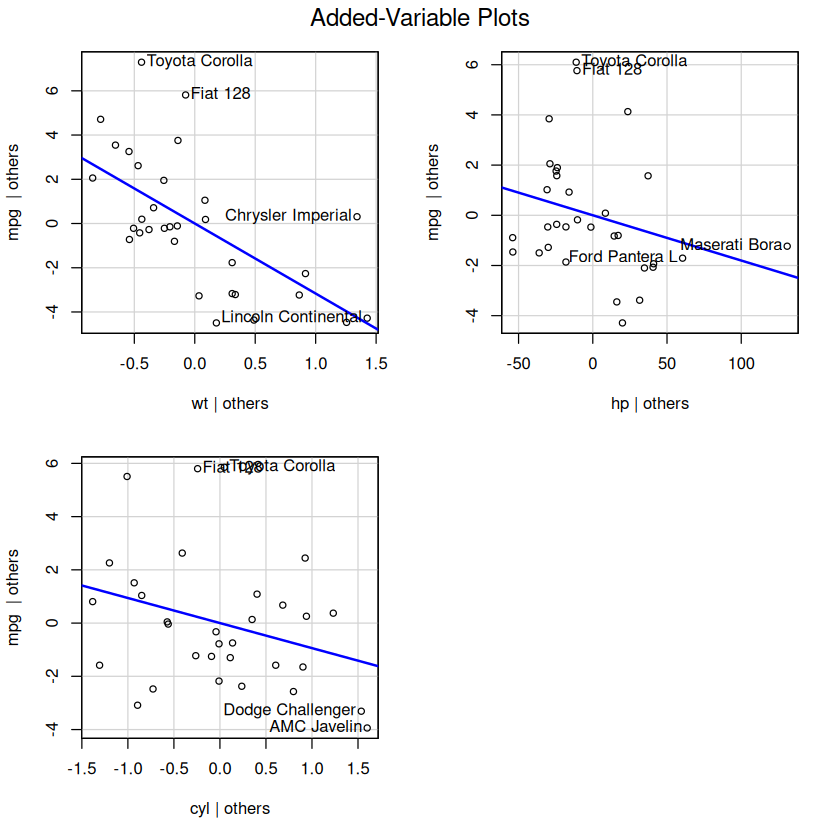

In [9]:
avPlots(mod)

#### Effects Plots
As an alternative to added-variable plots, we can instead create *effects* plots. Here, rather than removing the influence of other effects in the model, we simply fix them at some constant value. For instance, in plotting the effects of $x_{i1}$ in the following model

$$
y_{i} = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \beta_{3}x_{i3} + e_{i}
$$

we can calculate predicted values by setting $x_{i2}$ and $x_{i3}$ to their means

$$
\hat{y}^{(x_1)}_{i} = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}\bar{x}_{2} + \beta_{3}\bar{x}_{3}.
$$

In this way, we do not remove the other variables, we just keep them fixed so that only the variable of interest changes. The advantage of doing this is that we can examine the effect without the need to residualise the data, which can provide a more inuitive display of the model. For instance, we can make these types of plots using the `effects` package in `R`. For instance: 

lattice theme set by effectsTheme()
See ?effectsTheme for details.



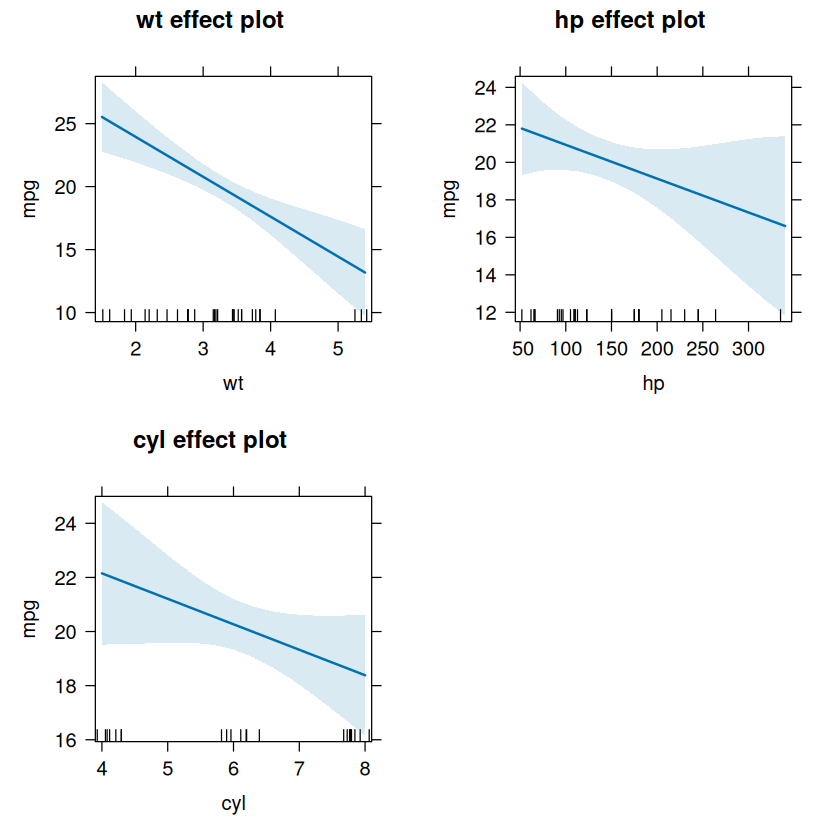

In [10]:
library(effects)
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(allEffects(mod))

Notice that this does not seem too dissimilar from the added-variable plots, though the $x$ and $y$ axis scales remain in the original units of the data. The `effects` package also draws a confidence band around the regression slope. This is calculated for each value on the $x$-axis by evaluating ... Importantly, this highlights the fact that certainty around the value of the regression slope depends upon how much data we have for different values of the predictor. This means that the band is *narrower* in places where there is both a greater concentration of data and where points are *closer* to the model prediction. 

These plots can also be advanced further by taking the effects predictions and adding back in the original residuals from the model. This allows us to see how close the model fit is to the data. The `effects` package then takes this further and draws a smooth curve through the pattern of residuals. This allows us to see whether there are any non-linear patterns that are not being captured by the model  

In [11]:
options(warn=-1) # suppress warnings from LOESS

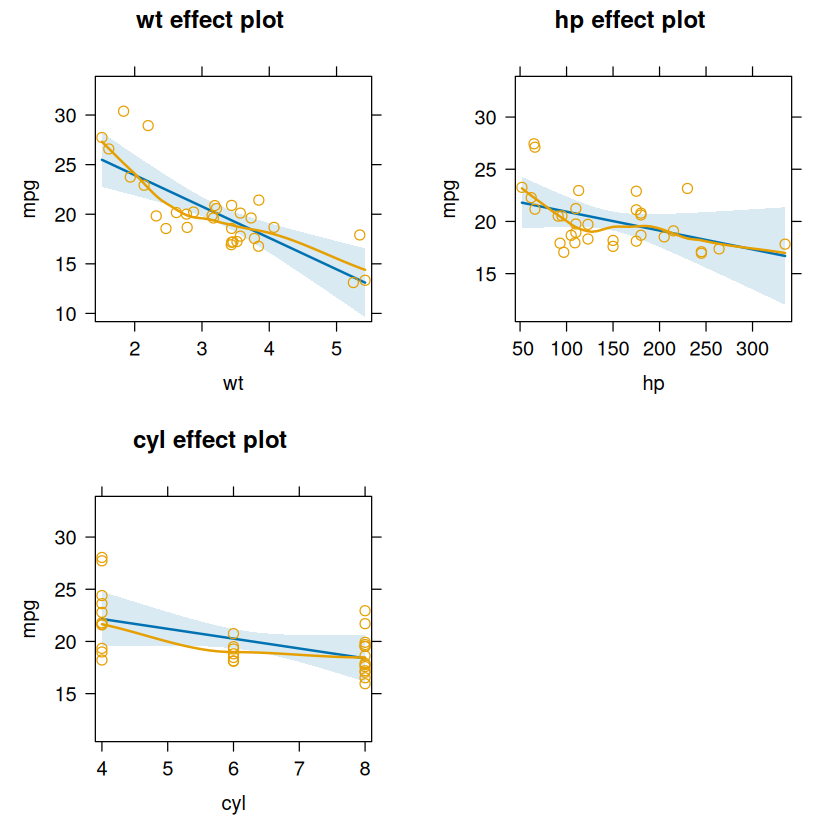

In [12]:
library(effects)
plot(allEffects(mod,residuals=TRUE))

Here we can start to see why this is useful, as there is some evidence of possible non-linearity in these relationships, particularly with `wt`. In addition, notice that the effects plot has retained the more categorical nature of `cyl`, which was removed when this variable was adjusted for the added-variable plots[^smooth-foot].

In [13]:
options(warn=0) # turning warnings back on to be safe

Effects plots will become increasingly relevant when we discuss visualising results from ANOVA and ANCOVA models, particularly when those models contain more complex interaction terms. These types of plots can also be defined for more complex linear models, such as generalised linear models and mixed-effects models. These plots and this package will therefore become an invaluable tool for understanding the effects from our models, as we progress on this course.

## Transformations

## Alternative Models When Assumptions are Violated

### Robust Regression for Outliers

### Generalised Least-squares for Heteroscedasticity

### Ridge-regression for Multicollinearity

### Non-parametric Resampling for Non-normality